In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import csv
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

In [ ]:
data = pd.read_csv('new_model.csv')
data.head()

In [24]:
data.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [25]:
x = data.drop(['Class'],axis=1)
y = data['Class']
lab_enc=LabelEncoder()
y=lab_enc.fit_transform(y)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [27]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train,Y_train)

y_predi=clf.predict(X_test)

In [28]:
AccR=accuracy_score(Y_test, y_predi)

In [29]:
print(AccR)

1.0


In [30]:
from sklearn.model_selection import cross_val_score
knn_sc=[]
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x,y,cv=15)
    knn_sc.append(score.mean())

Text(0.5,1,'k neighbour scores')

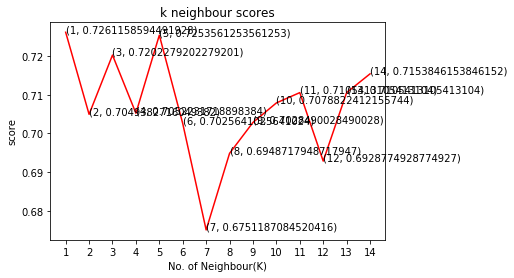

In [31]:
plt.plot([k for k in range(1,15)],knn_sc,color='red')
for i in range(1,15):
    plt.text(i,knn_sc[i-1],(i,knn_sc[i-1]))
plt.xticks([i for i in range(1,15)])
plt.xlabel("No. of Neighbour(K)")
plt.ylabel("score")
plt.title('k neighbour scores')

In [32]:

knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, Y_train)

    #Predict the response for test dataset
y_pred = knn.predict(X_test)

In [33]:
AccK=accuracy_score(Y_test, y_pred)

In [34]:
print(AccK)

0.75


In [35]:
model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(X_train,Y_train)
# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

Depth of the Decision Tree : 5


In [15]:
y_predi=model.predict(X_test)

In [16]:
AccD=accuracy_score(Y_test, y_predi)

In [17]:
print(AccD)

0.9916666666666667


In [18]:
Nb = GaussianNB()

#Train the model using the training sets
Nb.fit(X_train,Y_train)

#prediction
prediction=Nb.predict(X_test)

In [19]:
AccNB=accuracy_score(Y_test, prediction)

In [20]:
print(AccNB)

0.9166666666666666


In [40]:
newdf = pd.DataFrame({'RandomForest': AccR*100.0, 'DecisionTree':AccD*100.0,'Knn': AccK*100.0, 'NaiveBayes':AccNB*100.0},index=[0])

In [41]:
newdf

,RandomForest,DecisionTree,Knn,NaiveBayes
0,100.0,99.166667,75.0,91.666667


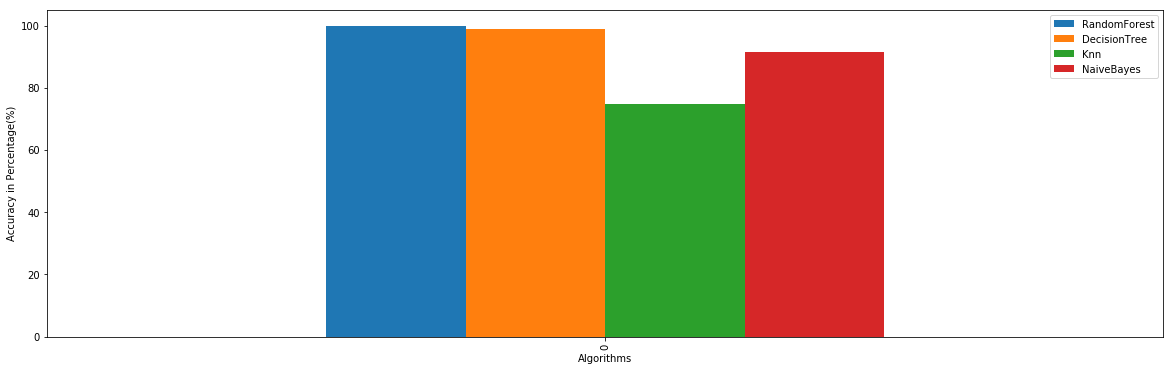

In [48]:
df1 = newdf
df1.plot(kind='bar',figsize=(20,6))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy in Percentage(%)')
plt.show()

In [38]:
import seaborn as sns

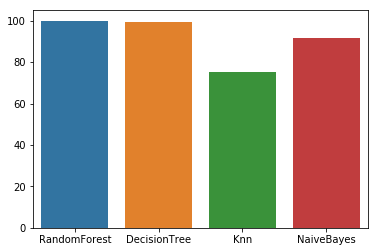

In [39]:
sns.barplot(data=df1)